Extracción de datos challenge Telecom 1

In [50]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/df_telecom")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ClienteID              7267 non-null   object 
 1   Churn                  7267 non-null   int64  
 2   Genero                 7267 non-null   object 
 3   AdultoMayor            7267 non-null   int64  
 4   Pareja                 7267 non-null   int64  
 5   Dependientes           7267 non-null   int64  
 6   Meses_Contrato         7267 non-null   int64  
 7   Telefono               7267 non-null   int64  
 8   MultiplesLineas        7267 non-null   int64  
 9   ServicioInternet       7267 non-null   object 
 10  OnlineSecurity         7267 non-null   int64  
 11  OnlineBackup           7267 non-null   int64  
 12  ProteccionDispositivo  7267 non-null   int64  
 13  Soporte                7267 non-null   int64  
 14  StreamingTV            7267 non-null   int64  
 15  Stre

# Eliminando columnas
Aquí eliminamos la columna de ID.

In [51]:
df_telecom = df.drop(['ClienteID'], axis=1)
df_telecom['ServicioInternet'] = df_telecom['ServicioInternet'].map({'0': 'No', 'DSL':'DSL', 'Fiber optic':'Fiber optic'})
df_telecom.head()

,Churn,Genero,AdultoMayor,Pareja,Dependientes,Meses_Contrato,Telefono,MultiplesLineas,ServicioInternet,OnlineSecurity,...,ProteccionDispositivo,Soporte,StreamingTV,StreamingPeliculas,Contrato,PaperlessBilling,MetodoPago,Cargos_Mensuales,Cargos_Total,Cuentas_Diarias
0,0,Femenino,0,1,1,9,1,0,DSL,0,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0,Masculino,0,0,0,9,1,1,DSL,0,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,1,Masculino,0,0,0,4,1,0,Fiber optic,0,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,1,Masculino,1,1,0,13,1,0,Fiber optic,0,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,1,Femenino,1,1,0,3,1,0,Fiber optic,0,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [52]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
categoricas = df_telecom.select_dtypes(include='object').columns.tolist()
print(categoricas)
one_hot = make_column_transformer((OneHotEncoder(sparse_output=False,handle_unknown='ignore'),categoricas),remainder='passthrough',sparse_threshold=0,force_int_remainder_cols=False)
df_model = one_hot.fit_transform(df_telecom)
df_model = pd.DataFrame(df_model, columns=one_hot.get_feature_names_out())
df_model.columns = df_model.columns.str.replace(r'^onehotencoder__', '', regex=True)
df_model.columns = df_model.columns.str.replace(r'^remainder__', '', regex=True)
df_model.head()
df_model.info()

['Genero', 'ServicioInternet', 'Contrato', 'MetodoPago']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Genero_Femenino                       7267 non-null   float64
 1   Genero_Masculino                      7267 non-null   float64
 2   ServicioInternet_DSL                  7267 non-null   float64
 3   ServicioInternet_Fiber optic          7267 non-null   float64
 4   ServicioInternet_No                   7267 non-null   float64
 5   Contrato_Month-to-month               7267 non-null   float64
 6   Contrato_One year                     7267 non-null   float64
 7   Contrato_Two year                     7267 non-null   float64
 8   MetodoPago_Bank transfer (automatic)  7267 non-null   float64
 9   MetodoPago_Credit card (automatic)    7267 non-null   float64
 10  MetodoPago_Electronic check

# Verificación de la proporción variable Churn

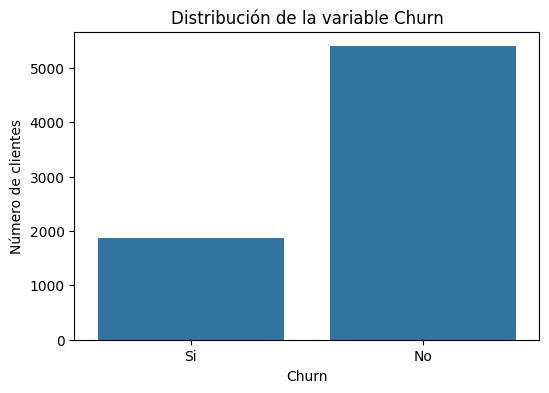

Porcentaje clientes que se fueron: 25.7190037154259%
Porcentaje clientes que se quedaron: 74.2809962845741%


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = {
    "Churn": ["Si"] * int(df_model['Churn'].sum()) + ["No"] * (7267-int(df_model['Churn'].sum()))
}
df = pd.DataFrame(data)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Churn")
plt.title("Distribución de la variable Churn")
plt.ylabel("Número de clientes")
plt.xlabel("Churn")
plt.show()
print("Porcentaje clientes que se fueron: " + str(df_model['Churn'].sum()*100/len(df_model)) + "%")
print("Porcentaje clientes que se quedaron: " + str((len(df_model) - df_model['Churn'].sum())/len(df_model)*100) + "%")
# Un desbalanceo se genera cuando una clase es mayor que otra, en este caso existe un ligero desbalanceo entre las clases que se puede corregir ajustando pesos

# Visualizando el mapa de correlación
Aquí vamos a ver todas nuestras variables para ver cuales son las que tienen un mayor indice de correlación y cuales son las que más están relacionadas con el churn, antes de eso eliminamos dos columnas más

In [54]:
df_model1 = df_model.drop(['Genero_Masculino'], axis=1) # Para evitar una correlacion alta
df_model1 = df_model1.drop(['Cuentas_Diarias'], axis=1) # Porque es igual a la de cargos mensuales solo que dividido entre 30


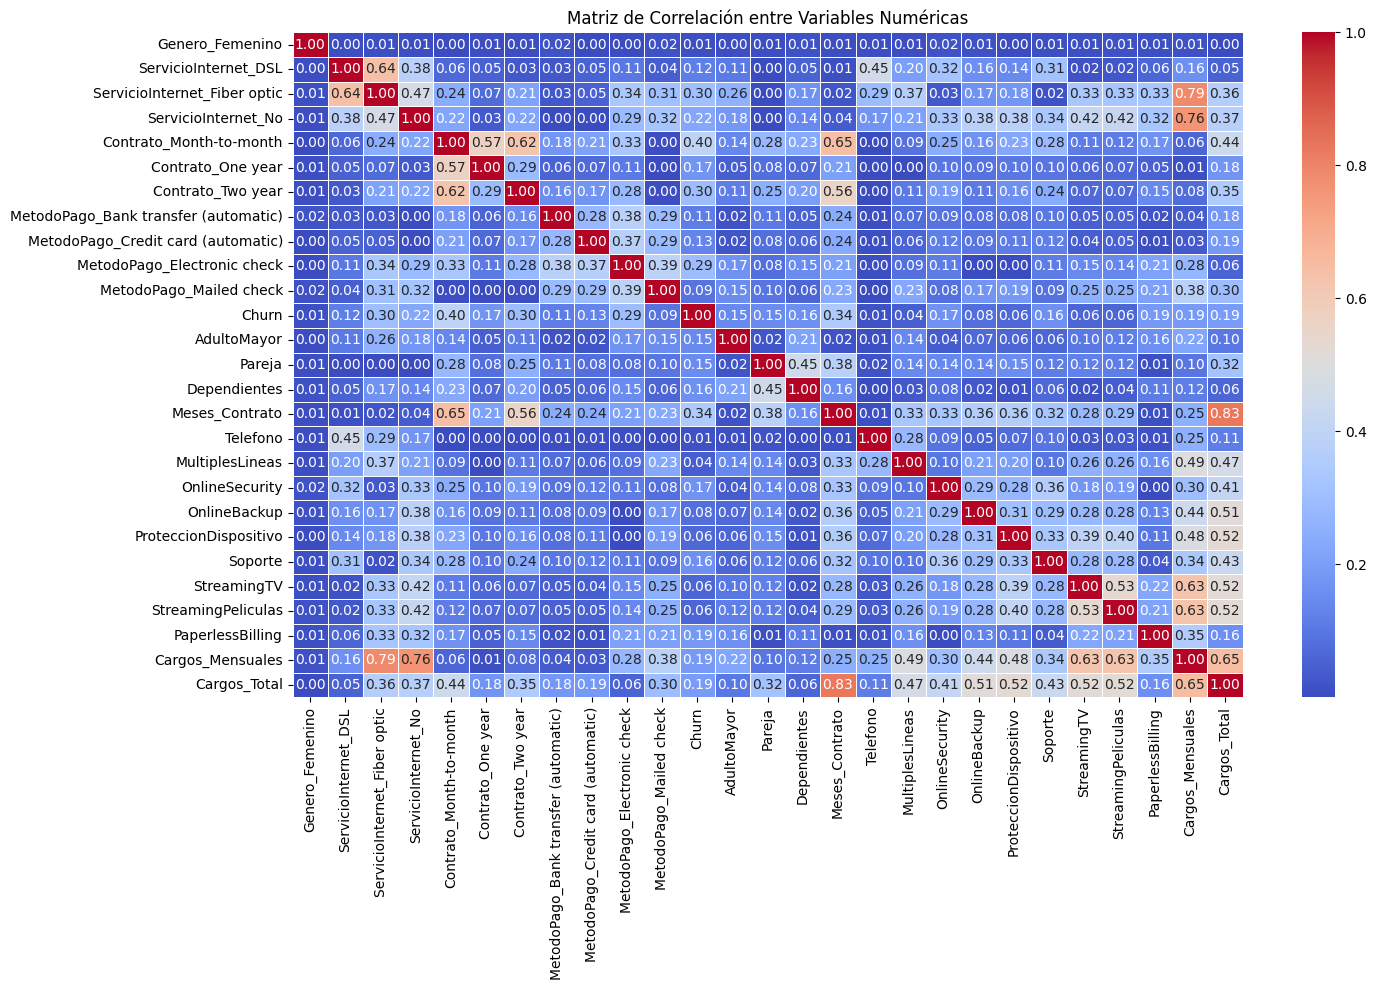

Top 10 variables más correlacionadas con Churn:
Contrato_Month-to-month         0.395584
Meses_Contrato                  0.344079
ServicioInternet_Fiber optic    0.300949
Contrato_Two year               0.295138
MetodoPago_Electronic check     0.294626
ServicioInternet_No             0.224051
Cargos_Total                    0.193345
Cargos_Mensuales                0.189866
PaperlessBilling                0.186666
Contrato_One year               0.173958
Name: Churn, dtype: float64
Top 10 variables menos correlacionadas con Churn:
Telefono                                0.012571
MultiplesLineas                         0.039343
StreamingPeliculas                      0.060586
StreamingTV                             0.062430
ProteccionDispositivo                   0.063452
OnlineBackup                            0.080163
MetodoPago_Mailed check                 0.090061
MetodoPago_Bank transfer (automatic)    0.114767
ServicioInternet_DSL                    0.120020
MetodoPago_Credit card 

In [73]:
df_correlacion = df_model1.select_dtypes(include=['float64']).corr().abs()
plt.figure(figsize=(15, 10))
sns.heatmap(df_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.tight_layout()
plt.show()
top_correlacion = df_correlacion['Churn'].sort_values(ascending=False)
top10 = top_correlacion[1:11]
topmenos_correlacion = df_correlacion['Churn'].sort_values(ascending=True)
topmenos10 = topmenos_correlacion[1:11]
print("Top 10 variables más correlacionadas con Churn:")
print(top10)
print("Top 10 variables menos correlacionadas con Churn:")
print(topmenos10)
# Podemos eliminar las variables con una correlación menor a 0.1
columnas_a_conservar = df_correlacion['Churn'][df_correlacion['Churn'].abs() >= 0.1].index
df_model2 = df_model1[columnas_a_conservar]
df_model2_corr = df_correlacion[columnas_a_conservar]
df_model2.info()

# Análisis dirigido
Vamos a ver como se distribye la cancelación con el tipo de contrato y con lo gastado.

In [74]:
from re import M
import plotly.express as px
import plotly.graph_objects as go
df_churn = df_model2[df_model2['Churn'] == 1]
df_norm = df_model2[df_model2['Churn'] == 0]
M = df_norm['Contrato_Month-to-month'].sum()
S = df_norm['Contrato_One year'].sum()
T = df_norm['Contrato_Two year'].sum()
labels = ['Month-to-month', 'One year', 'Two year']
values = [M, S, T]
MC = df_churn['Contrato_Month-to-month'].sum()
SC = df_churn['Contrato_One year'].sum()
TC = df_churn['Contrato_Two year'].sum()
no_churn = [M, S, T]

churn = [MC, SC, TC]
labels = ['Month-to-month', 'One year', 'Two year']

fig = go.Figure(data=[
    go.Bar(name='No Churn', x=labels, y=no_churn, marker_color='green'),
    go.Bar(name='Churn', x=labels, y=churn, marker_color='red')
])
fig.update_layout(
    barmode='group',
    title='Churn por Tipo de Contrato',
    xaxis_title='Tipo de Contrato',
    yaxis_title='Número de Clientes'
)
fig.show()

fig = px.box(
    df_model,
    x='Churn',
    y='Cargos_Total',
    color='Churn',
    labels={'Churn':'Cancelación', 'Cargos_Total':'Gasto Total'},
    color_discrete_map={0:'green', 1:'red'},
    title='Distribución de Gasto Total vs Cancelación'
)

fig.update_xaxes(tickvals=[0,1], ticktext=['No Churn','Churn'])
fig.show()


# Normalización
Creamos dos datset uno normalizado y otro no, para el modelo KNN usamos el normalizado

In [76]:
from sklearn.preprocessing import MinMaxScaler
normalizacion=MinMaxScaler()

df_modnorm=normalizacion.fit_transform(df_model2)
df_modnorm=pd.DataFrame(df_modnorm,columns=columnas_a_conservar)
df_modnorm.head(5)
df_corrorm=normalizacion.fit_transform(df_model2_corr)
df_corrorm=pd.DataFrame(df_corrorm,columns=columnas_a_conservar)
df_corrorm.head(5)

x = df_modnorm.drop('Churn', axis = 1)
y = df_modnorm['Churn']
x_corr = df_corrorm.drop('Churn', axis = 1)
y_corr = df_corrorm['Churn']

# Separación de los datos
Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos. En este caso se uso 20% de prueba

Exactitud: 78.68%
Precisión: 62.80%
Recall: 41.98%
F1 Score: 50.32%

Matriz de confusión:
[[987  93]
 [217 157]]
Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86      1080
         1.0       0.63      0.42      0.50       374

    accuracy                           0.79      1454
   macro avg       0.72      0.67      0.68      1454
weighted avg       0.77      0.79      0.77      1454



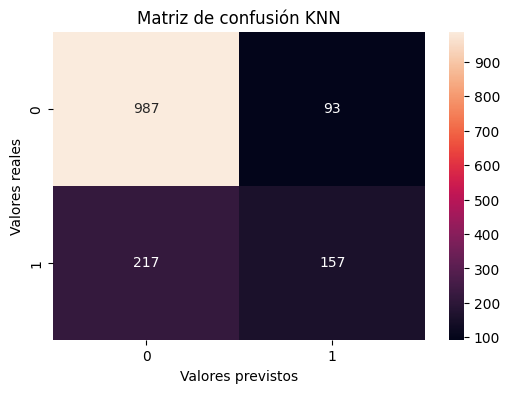

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
# Xc_trainc, Xc_testc, yc_trainc, yc_testc = train_test_split(x_corr, y_corr, test_size=0.2, random_state=42, stratify=y)
# Xc_trainc.shape, Xc_testc.shape, yc_trainc.shape, yc_testc.shape

MKNN = KNeighborsClassifier(n_neighbors=10)
MKNN.fit(X_train, y_train)

y_pred_knn = MKNN.predict(X_test)
print(f"Exactitud: {accuracy_score(y_test, y_pred_knn):.2%}")
print(f"Precisión: {precision_score(y_test, y_pred_knn):.2%}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.2%}")
print(f"F1 Score: {f1_score(y_test, y_pred_knn):.2%}")
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred_knn))
matrizconf = confusion_matrix(y_test, y_pred_knn)
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_knn))
plt.figure(figsize=(6, 4))
sns.heatmap(matrizconf, annot=True, fmt='d', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Valores previstos')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión KNN')
plt.show()

# Modelo de clasificación arbol
Ahora usaremos los datos pero sin normalizar porque este modelo no lo requiere al no depender de la escala de datos.



Exactitud: 79.57%
Precisión: 63.80%
Recall: 47.59%
F1 Score: 54.52%

Matriz de confusión:
[[979 101]
 [196 178]]
Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87      1080
         1.0       0.64      0.48      0.55       374

    accuracy                           0.80      1454
   macro avg       0.74      0.69      0.71      1454
weighted avg       0.78      0.80      0.79      1454



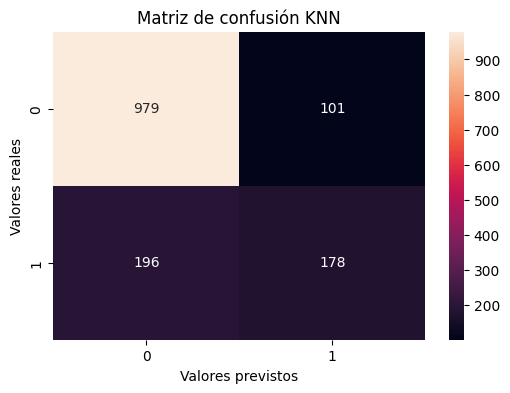

In [105]:
x1 = df_model2.drop('Churn', axis = 1)
y1 = df_model2['Churn']
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model2 = RandomForestClassifier(max_depth=100, min_samples_split=7, min_samples_leaf=15, max_features='log2', random_state=42)

X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=42, stratify=y1)
model2.fit(X_train, y_train)
y_predrf = model2.predict(X_test)
print(f"Exactitud: {accuracy_score(y_test, y_predrf):.2%}")
print(f"Precisión: {precision_score(y_test, y_predrf):.2%}")
print(f"Recall: {recall_score(y_test, y_predrf):.2%}")
print(f"F1 Score: {f1_score(y_test, y_predrf):.2%}")
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_predrf))
matrizconf = confusion_matrix(y_test, y_predrf)
print("Reporte de clasificación:")
print(classification_report(y_test, y_predrf))
plt.figure(figsize=(6, 4))
sns.heatmap(matrizconf, annot=True, fmt='d', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Valores previstos')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión KNN')
plt.show()

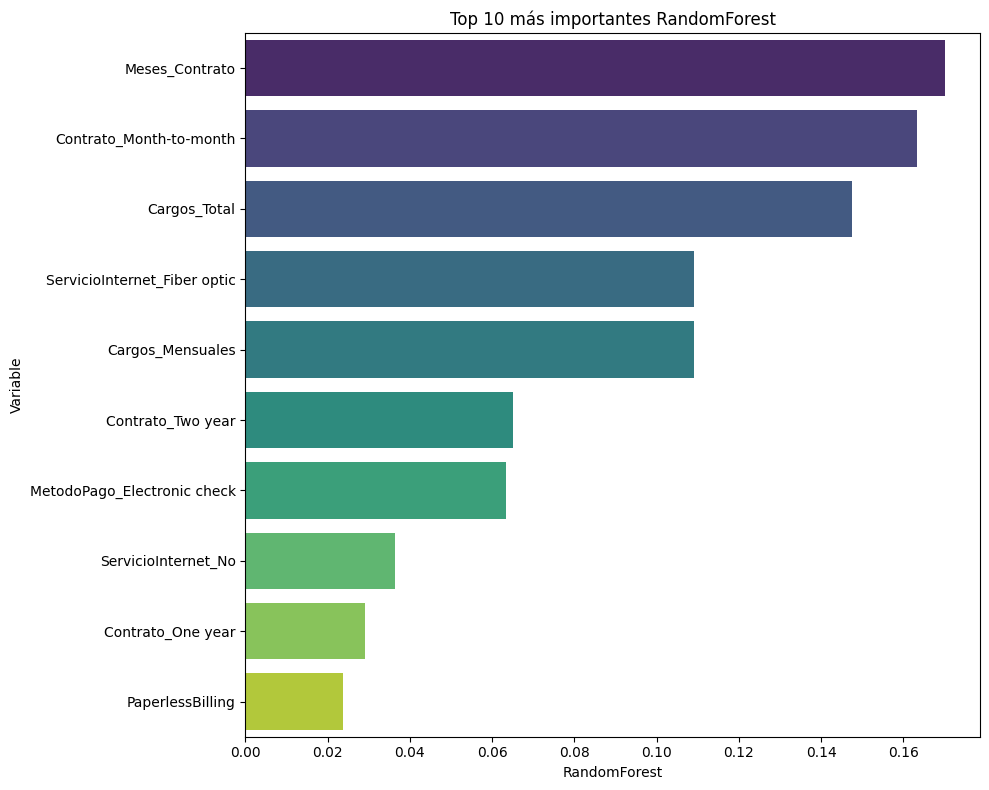

In [110]:
rfimport = model2.feature_importances_
feature_names = X_train.columns
df_importance = pd.DataFrame({'Variable': feature_names, 'RandomForest': rfimport})

fig, axes = plt.subplots(1, 1, figsize=(10, 8))
rfdata = df_importance.sort_values('RandomForest', ascending=False).head(10)
sns.barplot(x='RandomForest', y='Variable', data=rfdata, ax=axes, palette='viridis', hue='Variable')
axes.set_title('Top 10 más importantes RandomForest')
plt.tight_layout()
plt.show()